In [ ]:
#Import my dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os
import tensorflow as tf

In [4]:
df = pd.read_csv("../AAPL.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [5]:
#preprocessing our data
df = df['open'].values
df = df.reshape(-1,1)
print(df.shape)
df[:7]

(1259, 1)


array([[67.7142],
       [68.0714],
       [68.5014],
       [66.7442],
       [66.3599],
       [66.9785],
       [65.8714]])

In [6]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:7]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263],
       [0.14619996],
       [0.1321915 ]])

In [8]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:7]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213],
       [0.68006144],
       [0.69056368]])

In [9]:
def create_my_dataset(df):
    x = []
    y = []
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [10]:
x_train, y_train = create_my_dataset(dataset_train)
x_train[:1]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228]])

In [11]:
y_train[:1]

array([0.02895833])

In [12]:
x_test, y_test = create_my_dataset(dataset_test)
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [15]:
#reshaping for LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
print(x_train.shape)
print(x_test.shape)

(957, 50, 1)
(252, 50, 1)


In [22]:
from tensorflow import keras

In [24]:
import logging

In [26]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [27]:
tf.logging.set_verbosity(tf.logging.ERROR)
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9

In [29]:
model.compile(loss='mean_squared_error', optimizer ='adam')

In [30]:
if(not os.path.exists(r'C:\Users\Desktop\LSTM\stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save(r'C:\Users\Desktop\LSTM\stock_prediction.h5')

Train on 957 samples
Epoch 1/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0403
Epoch 2/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0060
Epoch 3/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0046
Epoch 4/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0043
Epoch 5/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0046
Epoch 6/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0045
Epoch 7/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0042
Epoch 8/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0038
Epoch 9/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0037
Epoch 10/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0039
Epoch 11/50
957/957 [==============================] - 3s 3ms/sample - loss: 0.0036
Epoch 12/50
957/957 [==============================] - 3s 3ms/sa

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 96)            37632     
_________________________________________________________________
dropout (Dropout)            (None, 50, 96)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 96)                74112     
_________________________________________________________________
dropout_2 (Dropout)          (None, 96)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9

range(1007, 1259)


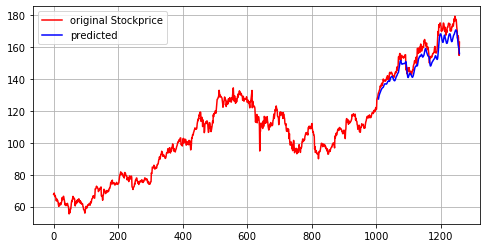

In [283]:
#visualizing our predictions
%matplotlib inline
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red', label='original Stockprice')
ax.plot(range(len(y_train)+50, len(y_train)+50+len(predictions)),predictions,color='blue', label='predicted')
plt.legend()
plt.grid()
print(range(len(y_train)+50, len(y_train)+50+len(predictions)))

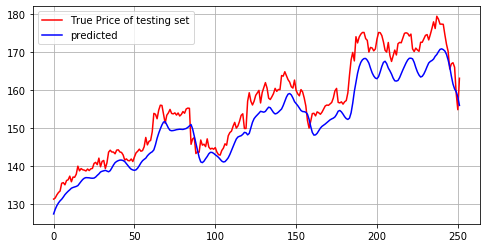

In [284]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label = 'True Price of testing set')
plt.plot(predictions, color = 'blue', label='predicted')
plt.grid()
plt.legend()

In [43]:
x_test.shape

(252, 50, 1)

# Future predictions

In [196]:
model.predict([[x_test[251]]])[0][0]

1.2720504

In [197]:
new_x=[]

In [47]:
x_test[251].tolist()

[[1.514293161653431],
 [1.513660496920188],
 [1.5041705259215394],
 [1.4830395238312146],
 [1.4552022755685123],
 [1.449128694129377],
 [1.481141529631485],
 [1.4378672618776474],
 [1.4181281222004585],
 [1.4374876630377016],
 [1.4559614732484043],
 [1.4396387231307282],
 [1.4769659423920798],
 [1.4813945955247823],
 [1.480129266058296],
 [1.4956928184960798],
 [1.5115094368271609],
 [1.5134074310268906],
 [1.511382903880512],
 [1.5025255976151066],
 [1.508978777894188],
 [1.4598839945945126],
 [1.4510266883291068],
 [1.4624146535274853],
 [1.45634107208835],
 [1.4517858860089987],
 [1.4817741943647285],
 [1.481900727311377],
 [1.4932886925097555],
 [1.5048031906547825],
 [1.5073338495877557],
 [1.4897457700035934],
 [1.50783998137435],
 [1.527958719891485],
 [1.5497223867150525],
 [1.5275791210515393],
 [1.568322729872404],
 [1.5587062259271067],
 [1.5421304099161337],
 [1.5421304099161337],
 [1.5414977451828906],
 [1.5067644513278364],
 [1.47506794819235],
 [1.4517858860089987],
 [1.

In [198]:
#PSEDUCODE

In [ ]:
0-50

1-49
add 51 = p xtest[50]
2-50
 add 52 =p xtest[51]
    

In [136]:
n_data=x_test[251].tolist()

In [108]:
model.predict([[n_data[0:50]]])[0][0]

1.2720504

In [167]:
n_data=x_test[251].tolist()
f=[]
for i in range(0,100):
    print(i)
    n_data2=n_data[i:50+i]
    print(i,50+i)
    print(len(n_data2),"LEN")
    #p=model.predict(np.array([n_data[0+i:50+i]]))
    p=model.predict([[np.array(n_data2)]])
    print(p,"PREDICT")
    f.append(p[0][0])
    n_data.append([p[0][0]]) 
    print("NEW_LEN",len(n_data))
    
    #n_data=n_data[0+i:50+i]
    

0
0 50
50 LEN
[[1.2720504]] PREDICT
NEW_LEN 51
1
1 51
50 LEN
[[1.2443871]] PREDICT
NEW_LEN 52
2
2 52
50 LEN
[[1.219496]] PREDICT
NEW_LEN 53
3
3 53
50 LEN
[[1.1976318]] PREDICT
NEW_LEN 54
4
4 54
50 LEN
[[1.1784766]] PREDICT
NEW_LEN 55
5
5 55
50 LEN
[[1.1616511]] PREDICT
NEW_LEN 56
6
6 56
50 LEN
[[1.1468365]] PREDICT
NEW_LEN 57
7
7 57
50 LEN
[[1.1337676]] PREDICT
NEW_LEN 58
8
8 58
50 LEN
[[1.1222103]] PREDICT
NEW_LEN 59
9
9 59
50 LEN
[[1.1119452]] PREDICT
NEW_LEN 60
10
10 60
50 LEN
[[1.1027634]] PREDICT
NEW_LEN 61
11
11 61
50 LEN
[[1.0944698]] PREDICT
NEW_LEN 62
12
12 62
50 LEN
[[1.0868857]] PREDICT
NEW_LEN 63
13
13 63
50 LEN
[[1.0798514]] PREDICT
NEW_LEN 64
14
14 64
50 LEN
[[1.07323]] PREDICT
NEW_LEN 65
15
15 65
50 LEN
[[1.0669072]] PREDICT
NEW_LEN 66
16
16 66
50 LEN
[[1.0607907]] PREDICT
NEW_LEN 67
17
17 67
50 LEN
[[1.0548083]] PREDICT
NEW_LEN 68
18
18 68
50 LEN
[[1.048908]] PREDICT
NEW_LEN 69
19
19 69
50 LEN
[[1.0430533]] PREDICT
NEW_LEN 70
20
20 70
50 LEN
[[1.0372221]] PREDICT
NEW_LE

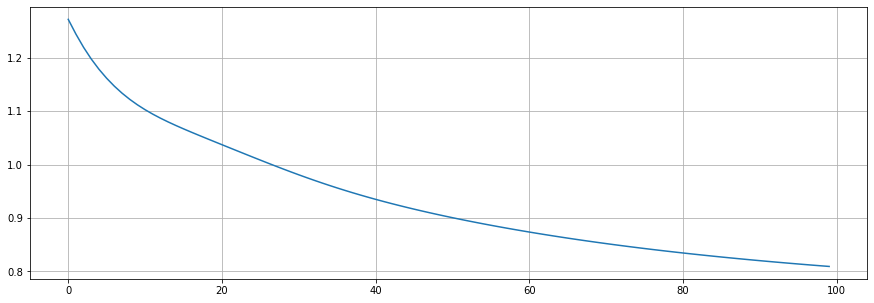

In [204]:
plt.figure(figsize=(15,5))
plt.plot(f)
plt.grid()

In [75]:
new_x[1]

[1.513660496920188]

In [199]:
# WE NEED TO SCALE THIS BACK

In [200]:
f2=scaler.inverse_transform([f])

In [188]:
f2.flatten()

array([155.95535923, 153.76911196, 151.8019454 , 150.0740021 ,
       148.56014627, 147.23041848, 146.05960758, 145.02676082,
       144.11337495, 143.30211494, 142.57647485, 141.92102274,
       141.32164564, 140.76571915, 140.24242771, 139.74272697,
       139.25933433, 138.78654056, 138.32023799, 137.85753432,
       137.39669605, 136.93682817, 136.47789299, 136.02023909,
       135.56463901, 135.11219503, 134.66407539, 134.22140592,
       133.78541137, 133.35713279, 132.93747461, 132.52719524,
       132.12695417, 131.73705758, 131.35783992, 130.98940484,
       130.63172877, 130.28468453, 129.94804602, 129.62154943,
       129.30479908, 128.99746051, 128.69905325, 128.40928523,
       128.12760061, 127.85372145, 127.58712489, 127.32748118,
       127.07448412, 126.82782283, 126.58720053, 126.35227806,
       126.12283402, 125.89869412, 125.67962754, 125.46542701,
       125.25595593, 125.05104942, 124.85061327, 124.65446848,
       124.462502  , 124.27464316, 124.09075536, 123.91

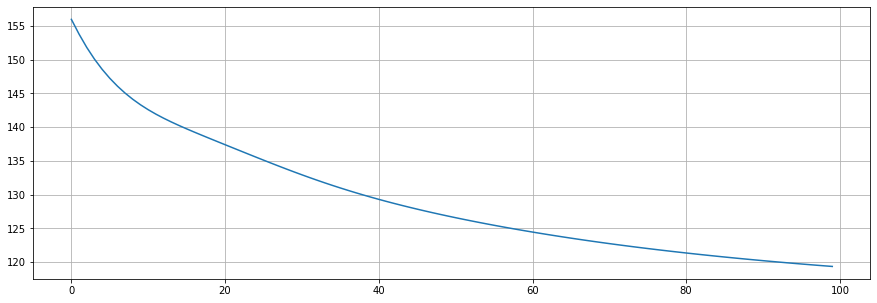

In [201]:
plt.figure(figsize=(15,5))
plt.plot(f2.flatten())
plt.grid()

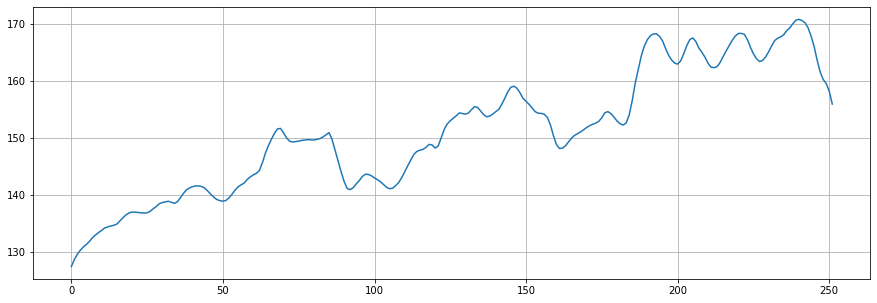

In [202]:
plt.figure(figsize=(15,5))
plt.plot(predictions2)
plt.grid()

In [203]:
#conclusion for stocks we can not predict but can reliably only show a positive and negative trend